In [1]:
# modules import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gsw
import seaborn as sns

/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site

/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/miniconda3/lib/python3.8/site

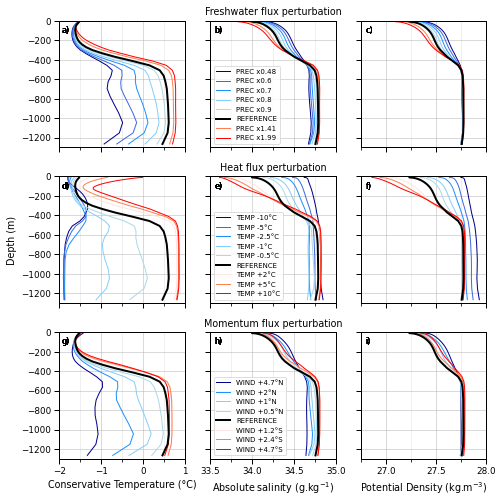

In [2]:
sns.set_context('paper')

# figure
f = plt.figure(figsize = (7.08, 7.08))
ax={}
nb_rows = 3
nb_cols = 3

# colormap and legend
color_TEMP = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'mistyrose', 'coral', 'red']
color_PREC = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'coral', 'red']
color_WIND = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'mistyrose', 'coral', 'red']
b_WIND = ['WIND +4.7°N', 'WIND +2°N', 'WIND +1°N', 'WIND +0.5°N', 'REFERENCE', 'WIND +1.2°S', 'WIND +2.4°S', 'WIND +4.7°S']
b_PREC = ['PREC x0.48', 'PREC x0.6', 'PREC x0.7', 'PREC x0.8', 'PREC x0.9', 'REFERENCE', 'PREC x1.41', 'PREC x1.99']
b_TEMP = ['TEMP -10°C', 'TEMP -5°C', 'TEMP -2.5°C', 'TEMP -1°C', 'TEMP -0.5°C', 'REFERENCE', 'TEMP +2°C', 'TEMP +5°C', 'TEMP +10°C']

k=-2
total = ['PREC', 'TEMP', 'WIND']
general_path='/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/thermocline'
for i in total:
    netCDF_NEMO_file = f"{general_path}/NETCDF_PROF_{i}.nc"
    TOT = xr.open_mfdataset(netCDF_NEMO_file)
    b = np.array(TOT['num'])
    TOT0 = TOT.where(TOT.time.dt.year >= 1988).mean('time')
    k = k+3
    # Temperature plot
    ax[k] = f.add_subplot(nb_rows,nb_cols, k)
    if i =='TEMP':
        colors = color_TEMP
        b = b_TEMP
    elif i =='PREC':
        colors = color_PREC
        b = b_PREC
    else :
        colors = color_WIND
        b = b_WIND
    for j in np.arange(0, TOT['num'].size, 1):
        TOT1 = TOT0.Temp[:, j]
        if colors[j]=='black':
            if i == 'TEMP' :
                ax[k].plot(TOT1, -TOT1.depth, linewidth = 2, color= colors[j], zorder=9)
            else:
                ax[k].plot(TOT1, -TOT1.depth, linewidth = 2, color= colors[j], zorder=8)
        else:
            ax[k].plot(TOT1, -TOT1.depth, linewidth = 1, color= colors[j])
        if i=='WIND':
            ax[k].set_xlabel('Conservative Temperature (°C)')
            ax[k].text(-1.95, -120, 'g)', fontsize=8)
        if i!='WIND':
            ax[k].axes.xaxis.set_ticklabels([])
        if i=='PREC':
            ax[k].text(-1.95, -120, 'a)', fontsize=8)
        if i=='TEMP':
            ax[k].text(-1.95, -120, 'd)', fontsize=8)
            ax[k].set_ylabel('Depth (m)')
        majorx_ticks = np.arange(-2, 1.5, 1)
        minorx_ticks = np.arange(-2, 1, 0.5)
        ax[k].set_xticks(majorx_ticks)
        ax[k].set_xticks(minorx_ticks, minor=True)
        ax[k].grid(which='both')
        ax[k].grid(which='minor', alpha=0.25)
        ax[k].grid(which='major', alpha=0.6)
        ax[k].set_xlim(-2,1)
        ax[k].set_ylim(-1300,0)
        plt.grid(True)
    # Salinity plot
    ax[k+1] = f.add_subplot(nb_rows,nb_cols, k+1)
    for j in np.arange(0, TOT['num'].size, 1):
        TOT2 = TOT0.Sal[:, j]
        if colors[j]=='black':
            if i == 'TEMP' :
                ax[k+1].plot(TOT2, -TOT2.depth, linewidth = 2, color= colors[j], label = b[j], zorder=9)
            else:
                ax[k+1].plot(TOT2, -TOT2.depth, linewidth = 2, color= colors[j], label = b[j], zorder=8)
        else:
            ax[k+1].plot(TOT2, -TOT2.depth, linewidth = 1, color= colors[j], label = b[j])
        if i=='WIND':
            ax[k+1].set_xlabel('Absolute salinity (g.kg$^{-1}$)')
            ax[k+1].text(33.55, -120, 'h)', fontsize=8)
            ax[k+1].set_title('Momentum flux perturbation')
        if i!='WIND':
            ax[k+1].axes.xaxis.set_ticklabels([])
        if i=='PREC':
            ax[k+1].text(33.55, -120, 'b)', fontsize=8)
            ax[k+1].set_title('Freshwater flux perturbation')
        if i=='TEMP':
            ax[k+1].text(33.55, -120, 'e)', fontsize=8)
            ax[k+1].set_title('Heat flux perturbation')
        ax[k+1].axes.yaxis.set_ticklabels([]) 
        majorx_ticks = np.arange(33.5, 35.5, 0.5)
        minorx_ticks = np.arange(33.5, 35, 0.25)
        ax[k+1].set_xticks(majorx_ticks)
        ax[k+1].set_xticks(minorx_ticks, minor=True)
        ax[k+1].grid(which='both')
        ax[k+1].grid(which='minor', alpha=0.25)
        ax[k+1].grid(which='major', alpha=0.6)
        ax[k+1].set_xlim(33.5,35)
        ax[k+1].set_ylim(-1300,0)
        plt.grid(True)
        plt.legend(loc = 'lower left', prop={"size":7})
    # density plot
    ax[k+2] = f.add_subplot(nb_rows,nb_cols, k+2)
    for j in np.arange(0, TOT['num'].size, 1):
        TOT1 = TOT0.Temp[:, j]
        TOT2 = TOT0.Sal[:, j]
        p = TOT0.depth
        potential_density = gsw.density.sigma0(TOT2, TOT1)
        if colors[j]=='black':
            if i == 'TEMP' :
                ax[k+2].plot(potential_density, -p, linewidth = 2, color= colors[j], zorder=9)
            else:
                ax[k+2].plot(potential_density, -p, linewidth = 2, color= colors[j], zorder=8)
        else:
            ax[k+2].plot(potential_density, -p, linewidth = 1, color= colors[j])
        if i=='WIND':
            ax[k+2].set_xlabel('Potential Density (kg.m$^{-3}$)')
            ax[k+2].text(26.8, -120, 'i)', fontsize=8)
        if i!='WIND':
            ax[k+2].axes.xaxis.set_ticklabels([])
        if i=='PREC':
            ax[k+2].text(26.8, -120, 'c)', fontsize=8)
        if i=='TEMP':
            ax[k+2].text(26.8, -120, 'f)', fontsize=8)
        ax[k+2].axes.yaxis.set_ticklabels([]) 
        majorx_ticks = np.arange(27, 29, 0.5)
        minorx_ticks = np.arange(26.75, 28.25, 0.25)
        ax[k+2].set_xticks(majorx_ticks)
        ax[k+2].set_xticks(minorx_ticks, minor=True)
        ax[k+2].grid(which='both')
        ax[k+2].grid(which='minor', alpha=0.25)
        ax[k+2].grid(which='major', alpha=0.6)
        ax[k+2].set_xlim(26.75,28)
        ax[k+2].set_ylim(-1300,0)
        plt.grid(True)
    
        plt.tight_layout()
# saved file
plt.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/vertical_profils.pdf')